From research conducted observing Fire Facts - Incident response times 2017  page - 5

The 'first_response_secs' is meant to be recorded when the brigade arrives at the incident scene, not after the incident has been dealt with.
The key evidence for this is the statement about "some times are wrong (due to failure to use the fire engine recording systems at the appropriate time)," which indicates that crews are supposed to record their arrival time as it happens. The system relies on fire crews activating recording systems when they arrive, but they sometimes fail to do this at the correct moment.
This timing is critical for measuring response performance, and the paragraph acknowledges that errors in the recording process lead to some data being excluded from our dataframe.

So, the 'first_pump_arriving_attendance_time' represents when the first fire engine physically arrived at the incident location, not when they finished handling the incident. This information is important as it provides important information about how we will deal with target leakage within the machine learning problem statement.

I applied capping (Winsorizing) to the outliers in the response time data for the lower end of my IQR for 'first_pump_arriving_attendance_time'

In [ ]:
df_model = df.copy()

In [ ]:
df_model.drop(columns=["rt_q"], inplace=True)#drop yes


df_model.drop(columns=["rt_resid"], inplace=True)#drop yes


df_model.drop(columns=["avg_rt_in_bin"], inplace=True)#cube consiting each borough responses times where compared for each borough in a week


df_model.drop(columns=["grid_id"], inplace=True)



Text(0, 0.5, 'Frequency')

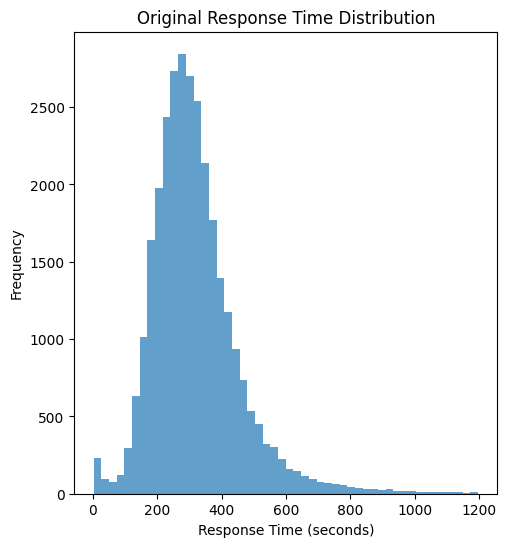

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_model['first_response_secs'], bins=50, alpha=0.7)
plt.title('Original Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

In [ ]:
very_low_values = df_model[df_model['first_response_secs'] < 60]
print(f"Number of suspiciously fast responses (< 60 seconds): {len(very_low_values)}")
print(very_low_values['first_response_secs'].value_counts().sort_index())

Number of suspiciously fast responses (< 60 seconds): 355
first_response_secs
2.0     13
3.0     48
4.0     33
5.0     12
6.0     15
7.0      7
8.0     10
9.0      6
10.0     6
11.0     4
12.0     7
13.0    11
14.0     9
15.0     5
16.0     8
17.0     1
18.0     4
19.0     3
20.0     6
21.0     3
22.0     2
23.0     5
24.0     4
25.0     7
26.0     8
27.0     7
28.0     5
29.0     4
30.0     7
32.0     4
33.0     4
34.0     4
35.0     6
36.0     4
37.0     2
38.0     1
39.0     2
40.0     6
41.0    13
42.0     4
43.0     1
44.0     1
46.0     5
47.0     2
48.0     2
49.0     1
50.0     2
51.0     3
53.0     3
54.0     6
55.0     4
56.0     3
57.0     3
58.0     4
59.0     5
Name: count, dtype: int64


https://data.london.gov.uk/dataset/incident-response-times-fire-facts
page - 20

The quickest fire brigade reponse time ever recorded was 1 minute within the Uk, thus the min_realistic_time lower boundary time set was 60 seconds (4 minutes)

There are still response times under 60 seconds this is usually unrealistic for a fire brigade to attend, thus this issue is addressed by removing these outlier values, these response times could have been put inplace due to data entry issues as a result they will be removed.

steps:
A minimum realistic time was set to 60 seconds as this was an absolute minimum feasible response time in seconds.
Capping was only applied to the lower end and upper values were unchanged.

In [ ]:
min_realistic_time = 60

df_model['first_pump_arriving_attendance_time_capped'] = df_model['first_response_secs'].clip(
    lower=min_realistic_time
)

A maximum response time of 1196 seconds or lower (19.9 minutes) is absolutely reasonable for fire brigade responses. This is within the expected range for real-world emergency services, especially:

- For incidents in remote locations
- During high traffic periods
- When resources are stretched due to multiple simultaneous incidents
- In areas with challenging access

In [ ]:
print(f"Original range: {df_model['first_response_secs'].min()} to {df_model['first_response_secs'].max()}")
print(f"Capped range: {df_model['first_pump_arriving_attendance_time_capped'].min()} to {df_model['first_pump_arriving_attendance_time_capped'].max()}")

Original range: 2.0 to 1196.0
Capped range: 60.0 to 1196.0


Text(0, 0.5, 'Frequency')

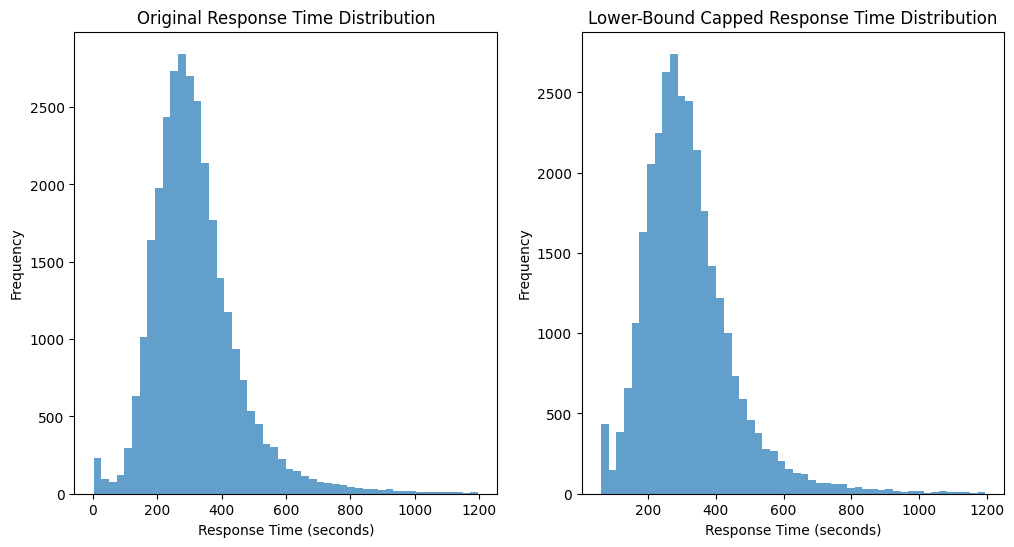

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_model['first_response_secs'], bins=50, alpha=0.7)
plt.title('Original Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_model['first_pump_arriving_attendance_time_capped'], bins=50, alpha=0.7)
plt.title('Lower-Bound Capped Response Time Distribution')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

Outliers for were not removed for num_pumps as the lowest value is 1.0 and the highest is 7.0 which are realistic numbers for incidents.
Outliers for were not removed for num_of_stations as the lowest value is 1.0 and the highest is 6.0 which are realistic numbers number of stations with pumps attending an incident.

The quickest fire brigade response time ever recorded was 3 minutes and 46 seconds within the UK; however, using additional documentation, we concluded that the events recorded might have been documented when fire brigades were driving out already in the scene and were called to attend events so we concluded the most realistic earliest time they could have to arrive would have been 1 minute, thus capping was applied to remove values lower than 60 seconds to reflect real-world scenario's.

The longest response time for second_pump_arriving_attendance_time was 1195 seconds, which is a realistic response time; because of this, ranges above the 75th percentile were not removed. These are true outliers, and removing them would introduce bias into the project.

In [ ]:

df_model.drop(columns=["first_response_secs"], inplace=True)


df_model.rename(columns={"first_pump_arriving_attendance_time_capped": "first_pump_arriving_attendance_time"}, inplace=True)


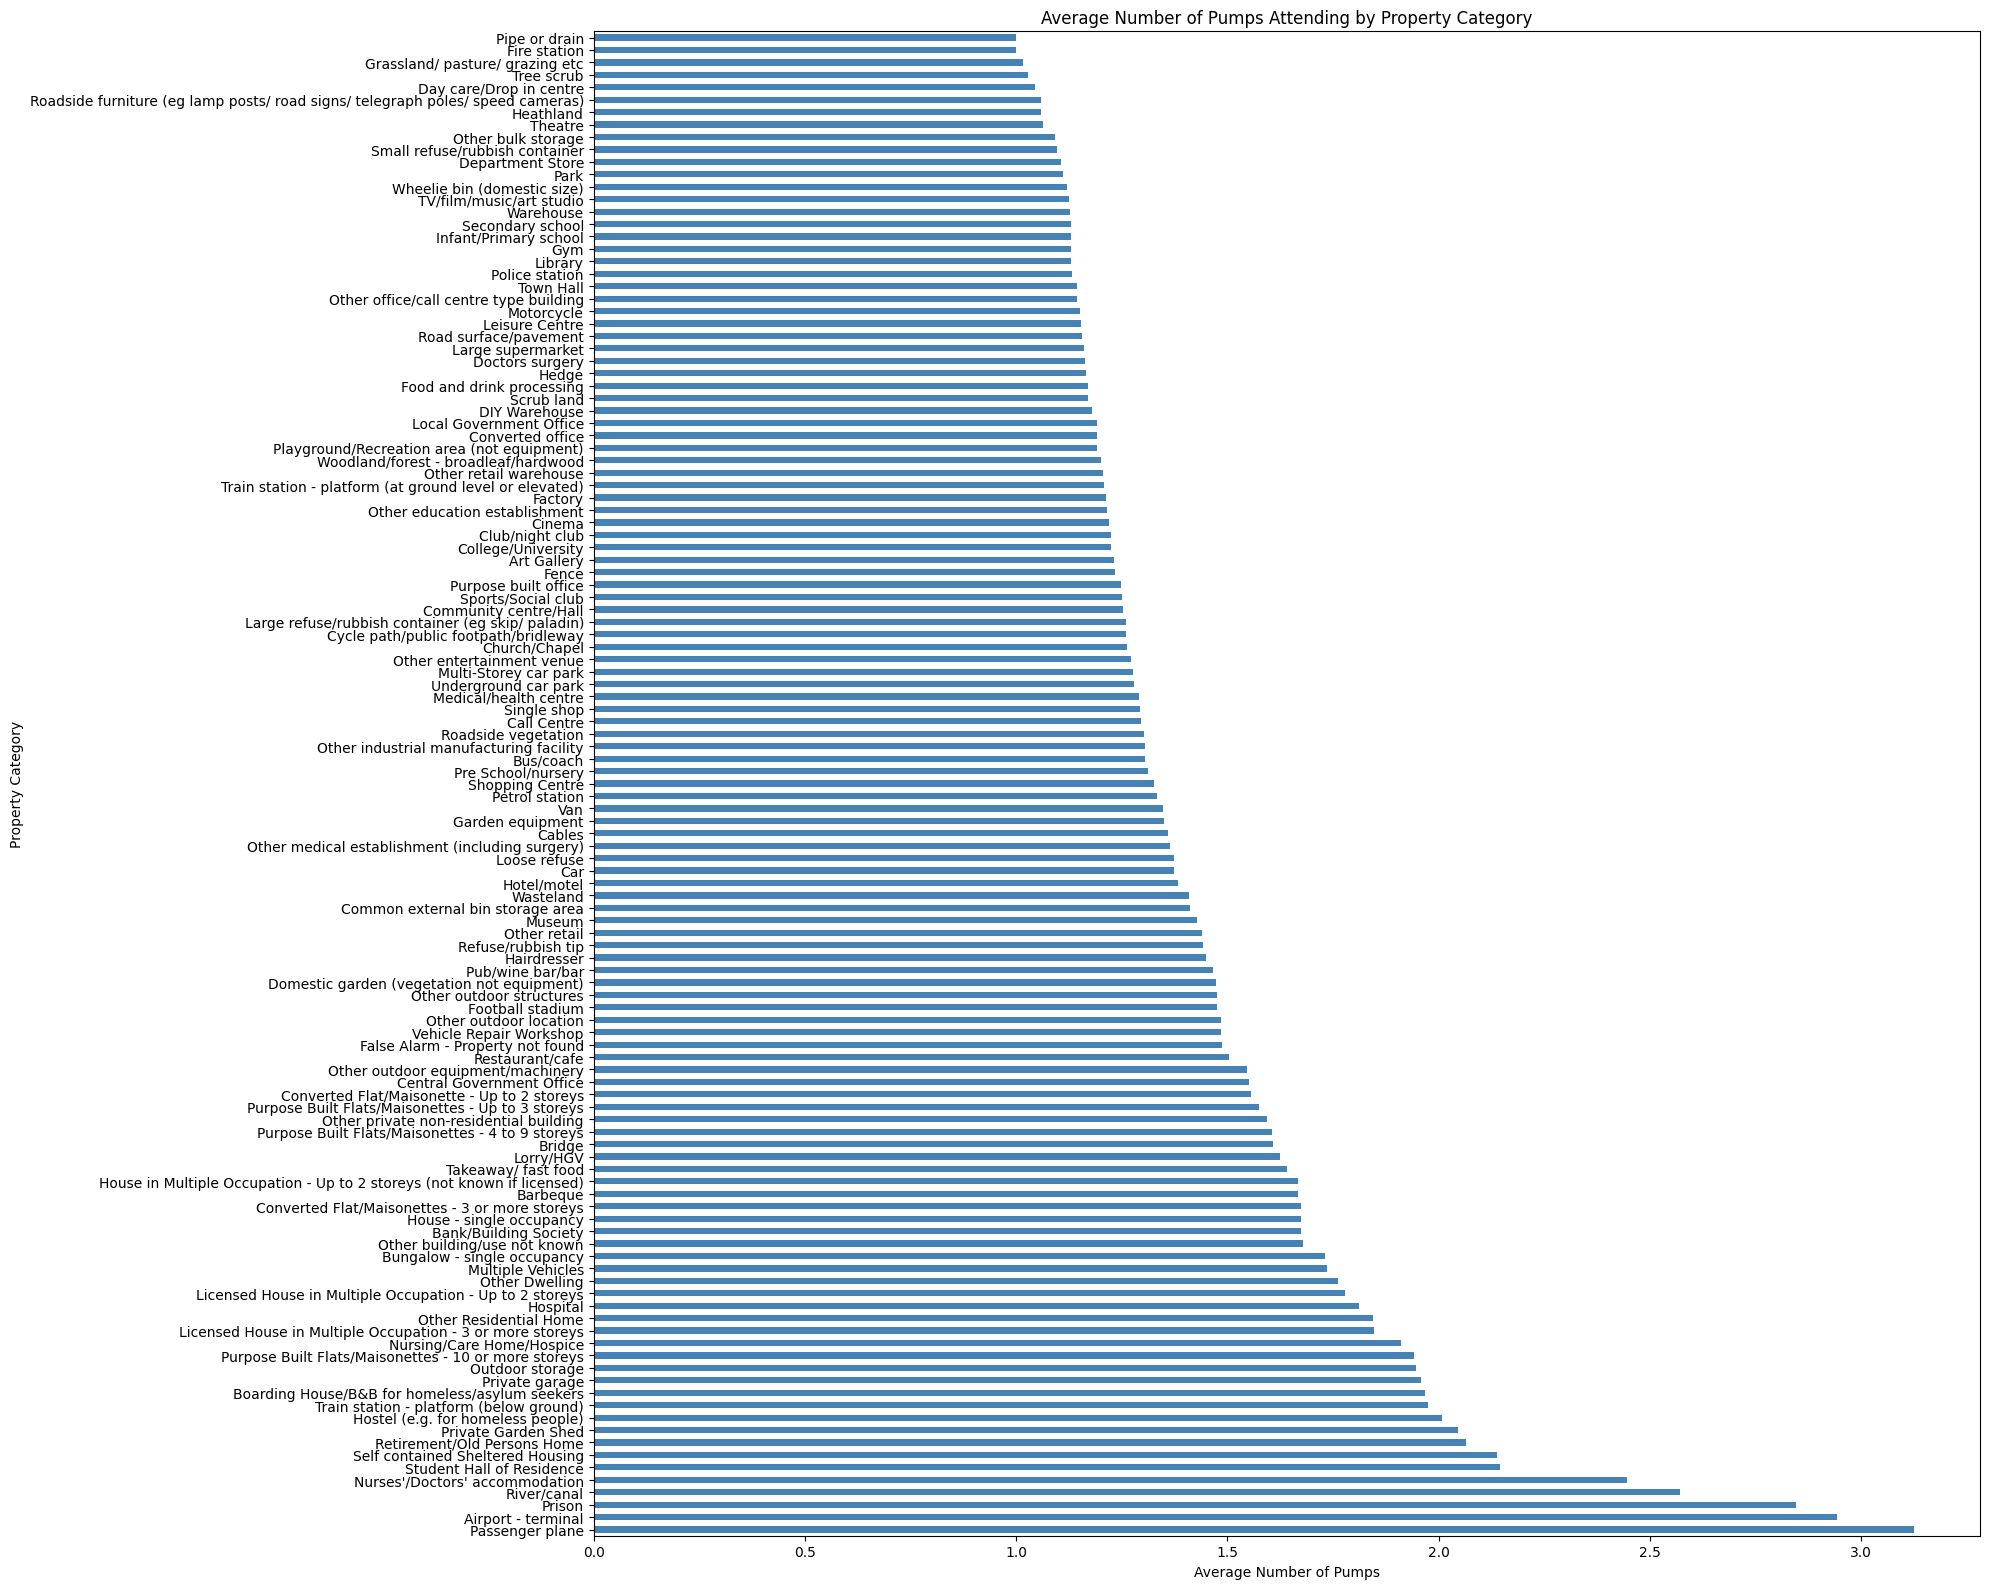

Minimum average pumps: 1.00
Maximum average pumps: 3.12
Range: 2.12
Standard deviation: 0.40


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# df = pd.read_csv('your_data.csv')

# Calculating the average pumps by property category
avg_pumps = df_model.groupby('property_type')['n_pumps'].mean().sort_values(ascending=False)

# Count the incidents by property category
counts = df_model.groupby('property_type').size()

# Keep only categories with at least 20 incidents for reliability
avg_pumps = avg_pumps[counts >= 20]


plt.figure(figsize=(20, 16))
avg_pumps.plot(kind='barh', color='steelblue')
plt.title('Average Number of Pumps Attending by Property Category')
plt.xlabel('Average Number of Pumps')
plt.ylabel('Property Category')
plt.tight_layout()
plt.savefig('property_pump_relationship.png')
plt.show()


print(f"Minimum average pumps: {avg_pumps.min():.2f}")
print(f"Maximum average pumps: {avg_pumps.max():.2f}")
print(f"Range: {avg_pumps.max() - avg_pumps.min():.2f}")
print(f"Standard deviation: {avg_pumps.std():.2f}")

https://data.london.gov.uk/dataset/incident-response-times-fire-facts

From research conducted observing Fire Facts - Incident response times 2017  page - 34
Feature Engineering Based on Historical Response Standards

Rationale for Area Density and Property Usage Classifications
When analysing London Fire Brigade response times, we identified a critical need to incorporate information about property types and area characteristics into our predictive model. This decision was informed by historical context from the Fire Facts 2017 report, which revealed how response time standards were previously structured in London.

Historical Context

Prior to the Fire and Rescue Services Act 2004, London was divided into four risk categories (A-D) that determined target response times:
"London was subdivided into four categories of risk (Categories A-D) based on government guidance on property characteristics. Category A represented the highest risk to property, and Category D represented the lowest risk to property."
These categories created significant disparities in service levels:
"For example, an area within Category A, which constituted 2 per cent of London in geographical terms immediately prior to the removal of these standards in 2004, demanded a fast response (five minutes for the first two appliances and a third appliance within eight minutes). By contrast, parts of London in Category D, which constituted 17 per cent of London geographically, could expect to wait up to 20 minutes for a response from one fire engine."
Furthermore, these categories were primarily based on property types and commercial activity:
"Category A areas were generally focussed on parts of inner London which had main shopping centre and business buildings, theatres and other entertainment venues or high-risk industrial property; significantly, there was no mention of housing in the Government's 'A' risk category."

Implementation of New Features

Although these categorical standards were officially replaced after 2004 with a principle of "equal entitlement," the physical infrastructure (station locations) established under the previous system would still impact current response patterns:
"London's emergency response and station locations were configured to provide a faster response in central and inner London than outer London, and there was a cluster of resources in the inner London boroughs."
To capture these historical influences, we engineered two new features:
Area Density Classification: Categorising locations into high-density commercial, high-density residential, low-density residential, and industrial areas to mirror the historical risk categorisation system.
Property Usage: Classifying properties as commercial, residential, industrial, or educational to reflect the different priority levels historically assigned to various property types.
These features help our model account for the legacy effects of historical resource allocation, which likely continue to influence response times today. Even with policy changes emphasising equal service, the physical distribution of fire stations and resources would retain imprints of the previous system, making these features valuable predictors for our response time model.

By incorporating these engineered features, our model can better understand and predict response time variations across different parts of London, accounting for modern operational practices and historical infrastructure patterns.

In [ ]:
def classify_area_density(property_type):
    """
    Classifies property types into area density categories:
    - High-density commercial
    - High-density residential
    - Low-density residential
    - Industrial areas
    - Other/Unknown
    """
    if pd.isna(property_type):
        return "Unknown"
    
    # High-density commercial properties
    high_density_commercial = [
        'Purpose built office', 'Single shop', 'Restaurant/cafe', 'Hospital', 
        'Large supermarket', 'Warehouse', 'Converted office', 'Hotel/motel', 
        'Pub/wine bar/bar', 'Medical/health centre', 'Gym', 'Leisure Centre',
        'Shopping Centre', 'Community centre/Hall', 'Factory', 'Fire station',
        'Takeaway/ fast food', 'Library', 'Church/Chapel', 'Food and drink processing',
        'Club/night club', 'Airport - terminal', 'Police station', 'Department Store',
        'Other retail', 'Petrol station', 'Doctors surgery', 'TV/film/music/art studio',
        'Train station', 'Bank/Building Society', 'Sports/Social club', 'DIY Warehouse',
        'Underground car park', 'Vehicle Repair Workshop', 'Cinema', 'Theatre',
        'Central Government Office', 'Museum', 'Multi-Storey car park', 'Call Centre',
        'Art Gallery', 'Local Government Office', 'Football stadium', 'Town Hall',
        'Other office/call centre type building', 'Telephone exchange', 'Dental surgery',
        'Laundrette', 'Exhibition Centre'
    ]
    
    # High-density residential properties
    high_density_residential = [
        'Purpose Built Flats/Maisonettes - 4 to 9 storeys',
        'Purpose Built Flats/Maisonettes - 10 or more storeys',
        'Converted Flat/Maisonettes - 3 or more storeys',
        'Retirement/Old Persons Home',
        'Nursing/Care Home/Hospice',
        'Hostel (e.g. for homeless people)',
        'Student Hall of Residence',
        'Licensed House in Multiple Occupation - 3 or more storeys',
        'House in Multiple Occupation - 3 or more storeys',
        'Unlicensed House in Multiple Occupation - 3 or more storeys',
        'Boarding House/B&B for homeless/asylum seekers',
        'Prison'
    ]
    
    # Low-density residential properties
    low_density_residential = [
        'House - single occupancy',
        'Purpose Built Flats/Maisonettes - Up to 3 storeys',
        'Self contained Sheltered Housing',
        'Converted Flat/Maisonette - Up to 2 storeys',
        'Licensed House in Multiple Occupation - Up to 2 storeys',
        'Bungalow - single occupancy',
        'House in Multiple Occupation - Up to 2 storeys',
        'Unlicensed House in Multiple Occupation - Up to 2 storeys',
        'Other Dwelling',
        'Caravan/Mobile home (permanent dwelling)',
        'Houseboat (permanent dwelling)'
    ]
    
    # Industrial areas
    industrial_areas = [
        'Warehouse', 'Factory', 'Food and drink processing', 'Other industrial manufacturing facility',
        'Other bulk storage', 'Engineering manufacturing plant', 'Other industrial processing plant',
        'Electricity power station', 'Recycling plant', 'Printing works', 'Laboratory/research Establishment',
        'Electrical warehouse', 'Water works', 'Sewage works', 'Manufacturing assembly plant',
        'Chemical plant', 'Bulk gas storage', 'Bulk hazardous materials storage', 'Bulk oil storage',
        'Distillery plant', 'Animal products processing plant'
    ]
    
    # Match property_type with area density category
    for keyword in high_density_commercial:
        if keyword.lower() in property_type.lower():
            return "High-density commercial"
            
    for keyword in high_density_residential:
        if keyword.lower() in property_type.lower():
            return "High-density residential"
            
    for keyword in low_density_residential:
        if keyword.lower() in property_type.lower():
            return "Low-density residential"
            
    for keyword in industrial_areas:
        if keyword.lower() in property_type.lower():
            return "Industrial area"
            
    return "Other_density"

In [ ]:
def classify_commercial_residential(property_type):
    """
    Classifies property types into:
    - Commercial
    - Residential
    - Industrial
    - Educational
    - Other/Unknown
    """
    if pd.isna(property_type):
        return "Unknown"
    
    # Commercial properties
    commercial = [
        'Purpose built office', 'Single shop', 'Restaurant/cafe', 'Large supermarket', 
        'Converted office', 'Hotel/motel', 'Pub/wine bar/bar', 'Medical/health centre', 
        'Gym', 'Leisure Centre', 'Shopping Centre', 'Community centre/Hall',
        'Takeaway/ fast food', 'Library', 'Church/Chapel', 'Club/night club', 
        'Airport - terminal', 'Department Store', 'Other retail', 'Petrol station', 
        'Doctors surgery', 'TV/film/music/art studio', 'Bank/Building Society', 
        'Sports/Social club', 'DIY Warehouse', 'Cinema', 'Theatre', 'Call Centre',
        'Art Gallery', 'Other entertainment venue', 'Hairdresser', 
        'Other office/call centre type building', 'Sports pavilion/shower block/changing facility',
        'Swimming Pool', 'Post office', 'Veterinary surgery', 'Indoor Market'
    ]
    
    # Residential properties
    residential = [
        'House - single occupancy', 'Purpose Built Flats/Maisonettes',
        'Self contained Sheltered Housing', 'Converted Flat/Maisonettes',
        'Converted Flat/Maisonette', 'Retirement/Old Persons Home',
        'Nursing/Care Home/Hospice', 'Hostel', 'Student Hall of Residence',
        'Licensed House in Multiple Occupation', 'Bungalow', 
        'Nurses\'/Doctors\' accommodation', 'Other Residential Home',
        'House in Multiple Occupation', 'Unlicensed House in Multiple Occupation',
        'Children\'s Home', 'Boarding House/B&B', 'Youth hostel',
        'Caravan/Mobile home (permanent dwelling)', 'Houseboat (permanent dwelling)'
    ]
    
    # Educational properties
    educational = [
        'Infant/Primary school', 'Secondary school', 'College/University',
        'Pre School/nursery', 'Other education establishment'
    ]
    
    # Industrial properties
    industrial = [
        'Warehouse', 'Factory', 'Food and drink processing', 'Other industrial manufacturing facility',
        'Other bulk storage', 'Engineering manufacturing plant', 'Other industrial processing plant',
        'Electricity power station', 'Recycling plant', 'Printing works', 'Laboratory/research Establishment',
        'Water works', 'Sewage works', 'Manufacturing assembly plant',
        'Chemical plant', 'Bulk gas storage', 'Bulk oil storage', 'Distillery plant'
    ]
    
    # Match property_type with category
    for keyword in commercial:
        if keyword.lower() in property_type.lower():
            return "Commercial"
            
    for keyword in residential:
        if keyword.lower() in property_type.lower():
            return "Residential"
            
    for keyword in educational:
        if keyword.lower() in property_type.lower():
            return "Educational"
            
    for keyword in industrial:
        if keyword.lower() in property_type.lower():
            return "Industrial"
            
    return "Other_property"

In [ ]:
df_model['area_density_class'] = df_model['property_type'].apply(classify_area_density)
df_model['property_usage'] = df_model['property_type'].apply(classify_commercial_residential)

We decided to remove the property_type column with high cardinality and choose to keep the more manageable property_category column. This decision supports our modelling goals for the following reasons:

Dimensionality Reduction
The property_type column contains 258 distinct values, which introduces considerable complexity when encoded for machine learning.

Model Interpretability
Models trained on fewer, more meaningful categories are generally more interpretable. Using property_category rather than individual property types makes it easier to understand how different classes of properties affect response times.

In [ ]:
df_model.drop(columns=["property_type"], inplace=True)


In [ ]:
borough_response_times = df_model.groupby('borough_name')['first_pump_arriving_attendance_time'].median().reset_index()
borough_response_times = borough_response_times.sort_values('first_pump_arriving_attendance_time')

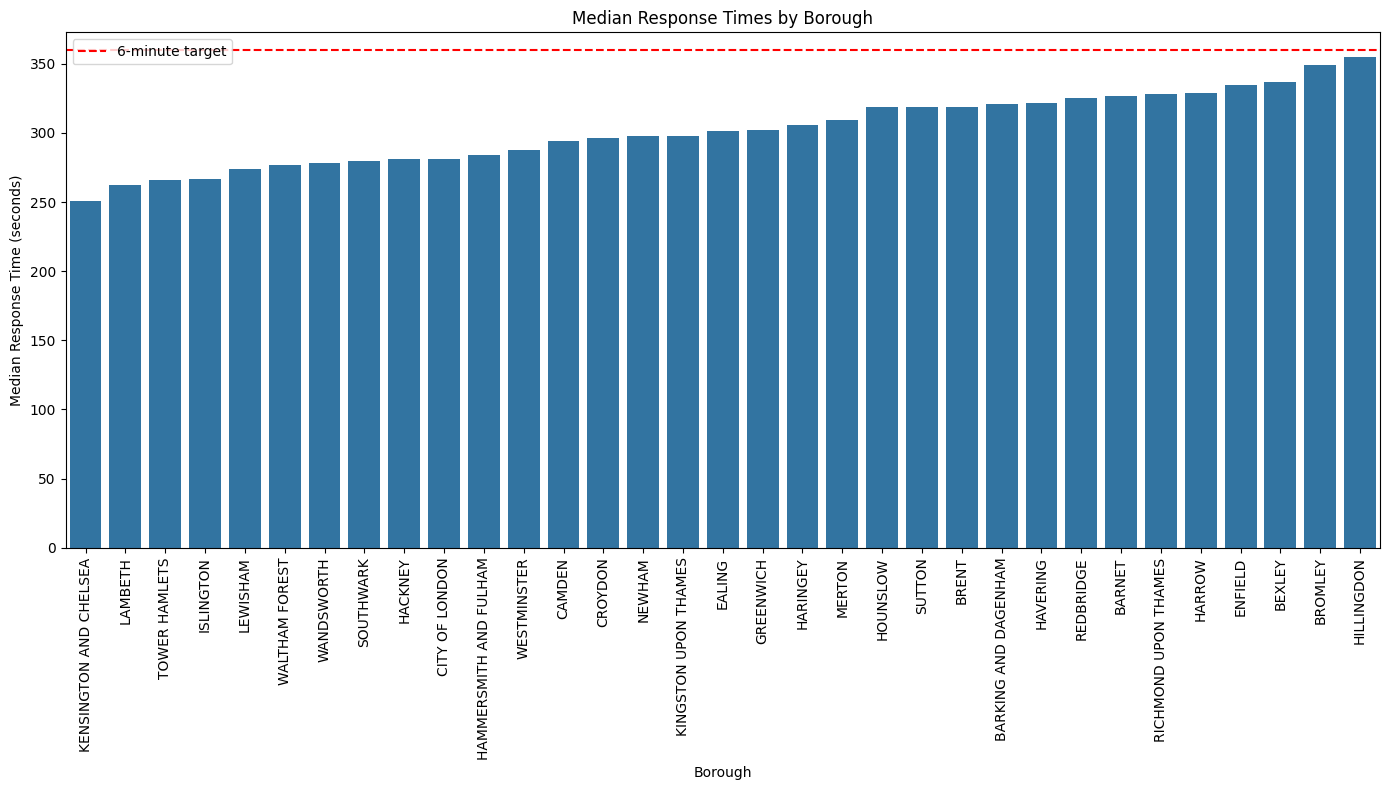

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='borough_name', y='first_pump_arriving_attendance_time', data=borough_response_times)
plt.title('Median Response Times by Borough')
plt.xlabel('Borough')
plt.ylabel('Median Response Time (seconds)')
plt.axhline(y=360, color='r', linestyle='--', label='6-minute target')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

When analysing our London Fire Brigade (LFB) dataset, we encountered rows where the responding station (first_response_station) had missing values. For these cases, we needed to impute appropriate values for the response times (first_pump_arriving_attendance_time) to maintain the integrity of our analysis.

Borough-Based Imputation: Fire brigade response times are primarily influenced by geographic location. Using the median response time for each borough, we acknowledged that incidents in the same area typically experience similar response times, regardless of which specific station responds.

We chose to use the median rather than the mean because response time data often contains outliers (unusually long response times due to exceptional circumstances). The median provides a more robust measure of central tendency that isn't skewed by these extreme values.

This imputation method allows us to fill in missing response times with values that are likely to be close to what they would have been in reality,

In [ ]:
borough_median_times = df_model.groupby('borough_name')['first_pump_arriving_attendance_time'].median()

In [ ]:
missing_mask = (df_model['first_response_station'].isna()) & (~df_model['borough_name'].isna())

In [ ]:
# Count how many values we'll impute
print(f"Total rows with missing station values: {missing_mask.sum()}")

Total rows with missing station values: 1585


Any instances of false alarms were changed to alarms because fire brigades respond to alarms and, at the time of dispatch, would only know that they're responding to an alarm, not a false alarm.

In [ ]:

df_model['incident_group'] = df_model['incident_group'].replace('False Alarm', 'Alarm')

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32004 entries, 0 to 32003
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   address_qualifier                    32004 non-null  object        
 1   borough_name                         32004 non-null  object        
 2   easting                              32004 non-null  float64       
 3   first_response_station               30419 non-null  object        
 4   incident_station_ground              32004 non-null  object        
 5   northing                             32004 non-null  float64       
 6   n_pumps                              32004 non-null  float64       
 7   n_stations                           32004 non-null  float64       
 8   postcode_district                    32004 non-null  object        
 9   property_category                    32004 non-null  object        
 10  special_se

In [ ]:
df_model['call_datetime'] = pd.to_datetime(df_model['call_datetime'])

Used cyclical encoding to preserve the circular nature of the days of the week:
It preserves the circular nature of the week. With regular encoding, the model would see Sunday (6) and Monday (0) as far apart when they are consecutive days.
The sine and cosine components together completely capture the cyclical pattern, allowing the model to learn seasonal effects more easily.

In [ ]:
# Cyclical encoding for day of week
df_model['dow_sin'] = np.sin(2 * np.pi * df_model['call_datetime'].dt.dayofweek/7)
df_model['dow_cos'] = np.cos(2 * np.pi * df_model['call_datetime'].dt.dayofweek/7) 

Used encoding to show whether whether or not it was the weekend

In [ ]:
df_model['is_weekend'] = df_model['call_datetime'].dt.dayofweek >= 5

In [ ]:
# remove date_of_call
df_model.drop(columns=["call_datetime"], inplace=True)

Cyclical encoding was used for the hour feature (from 0 to 23). Hours have a clear cyclical pattern, where 23:00 and 0:00 are adjacent times, not 23 hours apart, as linear encoding would suggest.
Given that we already have hour_of_call extracted as a numerical value from 0-23, I applied cyclical encoding to this column:

In [ ]:
# Cyclical encoding for hour
df_model['hour_sin'] = np.sin(2 * np.pi * df_model['call_hour']/24)
df_model['hour_cos'] = np.cos(2 * np.pi * df_model['call_hour']/24)

perform cyclic encoding on your hour_of_week column, you need to convert these values into sine and cosine components. This is particularly useful for cyclical features like hours, days, or months where the values wrap around (e.g., hour 0 is close to hour 23).
Given that your values appear to be "hour of week" (which typically would range from 0-167 for 24 hours × 7 days)

In [ ]:


max_value = 168  # 24 hours * 7 days
df_model['hour_of_week_sin'] = np.sin(2 * np.pi * df_model['hour_of_week'] / max_value)
df_model['hour_of_week_cos'] = np.cos(2 * np.pi * df_model['hour_of_week'] / max_value)

In [ ]:
df_model.drop(columns=["hour_of_week","call_hour"], inplace=True)

We removed stop_code_description this is because, incident_group column provides are higher level abstraction 

In [ ]:
df_model.drop(columns=["stop_code_description"], inplace=True) 

Adding easting and northing coordinates for all fire stations

In [ ]:
#how can i list a of unique values for a column in python data science ?
df_model['first_response_station'].unique()

array(['Euston', 'Stratford', nan, 'Ealing', 'Battersea', 'Poplar',
       'Orpington', 'Tooting', 'Enfield', 'Hillingdon', 'Sidcup',
       'Tottenham', 'Stoke Newington', 'Heston', 'Chiswick', 'Fulham',
       'Eltham', 'Wimbledon', 'Norbury', 'Edmonton', 'Woodside',
       'Kentish Town', 'Surbiton', 'Peckham', 'Brixton', 'Croydon',
       'West Hampstead', 'Bethnal Green', 'Old Kent Road', 'Kingston',
       'Hendon', 'Shoreditch', 'Finchley', 'Barnet', 'Hainault',
       'Leytonstone', 'East Ham', 'Lambeth', 'Bromley', 'Whitechapel',
       'Willesden', 'Hammersmith', 'Heathrow', 'North Kensington',
       'Paddington', 'Lewisham', 'Stanmore', 'Hayes', 'Beckenham',
       'Plumstead', 'Holloway', 'Southall', 'Greenwich', 'Ruislip',
       'New Malden', 'Kensington', 'Hornsey', 'New Cross', 'Barking',
       'East Greenwich', 'Feltham', 'Ilford', 'Chingford', 'Chelsea',
       'Woodford', 'Homerton', 'Erith', 'Walthamstow', 'Soho',
       'Wallington', 'Bexley', 'Park Royal', 'Clap

We created a new column that calculates the distance between fire stations and incident locations using the Euclidean distance formula with the easting and northing coordinates.
We did this by utilising the external source: https://gridreferencefinder.com/
The easting and northing coordinates of where the station is located were captured by utilising our postcode columns within our dataset and using the source Gridreferencefinder to convert the postcode into an appropriate format(easting and northing).
We then calculated the distance between each incident and the responding station and outputted the distances in meters.

In [ ]:
# Format used was: (easting, northing)}
station_coordinates = {
    'Euston': (529772, 182635),
    'Stratford': (539586, 184611),
    'Ealing': (516744, 180406),
    'Battersea': (527283, 175854),
    'Poplar': (537797, 180972),
    'Orpington': (547020, 165756),
    'Tooting': (527791, 172606),
    'Enfield': (534885, 197519),
    'Hillingdon': (507470, 182597),
    'Sidcup': (545665, 171879),
    'Tottenham': (533496, 189985),
    'Stoke Newington': (533424, 186541),
    'Heston': (515167, 176444),
    'Chiswick': (521096, 178471),
    'Fulham': (525008, 176918),
    'Eltham': (543176, 174419),
    'Wimbledon': (525527, 170048),
    'Norbury': (530748, 169235),
    'Edmonton': (533739, 193818),
    'Woodside': (534937, 167005),
    'Kentish Town': (528899, 185441),
    'Surbiton': (518514, 167286),
    'Peckham': (533584, 176741),
    'Brixton': (531432, 175548),
    'Croydon': (531995, 165038),
    'West Hampstead': (525375, 185219),
    'Bethnal Green': (535223, 182797),
    'Old Kent Road': (533778, 178203),
    'Kingston': (517844, 171226),
    'Hendon': (522813, 189265),
    'Shoreditch': (532990, 182596),
    'Finchley': (526205, 190359),
    'Barnet': (525610, 195833),
    'Hainault': (545718, 191773),
    'Leytonstone': (539346, 186598),
    'East Ham': (542802, 182508),
    'Lambeth': (530489, 178783),
    'Bromley': (540358, 169453),
    'Whitechapel': (534099, 181345),
    'Willesden': (522363, 184342),
    'Hammersmith': (523367, 178903),
    'Heathrow': (507134, 176819),
    'North Kensington': (524146, 181779),
    'Paddington': (526160, 181709),
    'Lewisham': (538131, 175010),
    'Stanmore': (518043, 190757),
    'Hayes': (508968, 178447),
    'Beckenham': (536834, 169498),
    'Plumstead': (545297, 178538),
    'Holloway': (530660, 186446),
    'Southall': (512938, 180399),
    'Greenwich': (538018, 176874),
    'Ruislip': (508548, 189105),
    'New Malden': (522166, 168126),
    'Kensington': (525717, 179778),
    'Hornsey': (529784, 189075),
    'New Cross': (535682, 176790),
    'Barking': (544989, 183280),
    'East Greenwich': (540490, 178392),
    'Feltham': (510336, 174756),
    'Ilford': (545075, 186911),
    'Chingford': (538296, 194208),
    'Chelsea': (527144, 178063),
    'Woodford': (540406, 191944),
    'Homerton': (535759, 185118),
    'Erith': (549872, 178498),
    'Walthamstow': (536740, 189736),
    'Soho': (529856, 180942),
    'Wallington': (529016, 164214),
    'Bexley': (549705, 175771),
    'Park Royal': (520345, 183328),
    'Clapham': (529230, 175676),
    'Hornchurch': (554004, 187415),
    'Plaistow': (541085, 182156),
    'Wembley': (517684, 185014),
    'Acton': (519701, 180170),
    'Mill Hill': (521714, 192157),
    'Wennington': (554164, 180931),
    'Dowgate': (532622, 180738),
    'Twickenham': (514887, 172005),
    'Millwall': (537136, 179834),
    'Sutton': (524666, 164923),
    'Shadwell': (535007, 180901),
    'Forest Hill': (536074, 173304),
    'Romford': (551345, 190507),
    'Islington': (531707, 184056),
    'Harrow': (513276, 189260),
    'Southgate': (529726, 194154),
    'Harold Hill': (554111.16, 191174.81),
    'Leyton': (537503, 186876),
    'Wandsworth': (525057, 174595),
    'Deptford': (536589, 178076),
    'Dockhead': (533980, 179738),
    'Dagenham': (549606, 186718),
    'Lee Green': (539975, 174951),
    'Mitcham': (527206, 168078),
    'West Norwood': (531822, 171395),
    'Richmond': (519243, 175674),
    'Biggin Hill': (541905, 159201),
    'Northolt': (513827, 185250),
    'Addington': (537728, 163196),
    'Purley': (530762, 160910),
    'Staines': (506435, 170860),
}

When analysing emergency response times, the physical distance between fire stations and incident locations is a critical factor. Our approach produced three powerful spatial features that significantly enhance our model's predictive capabilities while handling missing data.

Our implementation calculates three key distance-based features:

Distance to Responding Station: Measures how far the responding fire station was from the incident location
Distance to Nearest Station: Identifies the closest station to the incident, regardless of which one responded
Nearest Station Responded Flag: Indicates whether the closest station was the one that responded

Why we choose this approach
Preserving Data Integrity: Rather than removing rows with missing station information, we used the incident_station_ground column, which represents the station whose response area contains the incident location.

Geographical Reality: This substitution makes sense because incidents typically occur within the response area of their nearest station. Even if another station responded, the ground station provided a reasonable estimate for distance calculations.

Creates Robust Features: The three distance-based features capture different aspects of response efficiency:
Actual travel distance for the responding engine.
Potential shortest response distance.
Whether optimal station allocation occurred.

Euclidean Efficiency: While not accounting for road networks, the straight-line Euclidean distance provides an efficient approximation that strongly correlates with actual travel distances in urban environments.

In [ ]:
# Function to calculate Euclidean distance with fallback to incident_station_ground
def calculate_distance(row, station_coords):
    """Calculate distance between incident and fire station in meters"""
    # First try to use first_pump_arriving_deployed_from_station
    station = row['first_response_station']
    
    # If station is Unknown_station or NaN, use incident_station_ground instead
    if pd.isna(station) or station == "Unknown Station":
        station = row['incident_station_ground']
    
    # Check if we have coordinates for this station
    if station not in station_coords:
        return np.nan
        
    station_easting, station_northing = station_coords[station]
    
    # Calculate Euclidean distance
    distance = np.sqrt(
        (row['easting'] - station_easting)**2 + 
        (row['northing'] - station_northing)**2
    )
    
    return distance

In [ ]:
# Apply the function to create the new column
df_model['distance_to_station'] = df_model.apply(
    lambda row: calculate_distance(row, station_coordinates), 
    axis=1
)

In [ ]:
# For the nearest station calculation, keep it the same
def distance_to_nearest_station(row, station_coords):
    """Calculate distance to the nearest fire station in meters"""
    min_distance = float('inf')
    
    for station, (station_easting, station_northing) in station_coords.items():
        distance = np.sqrt(
            (row['easting'] - station_easting)**2 + 
            (row['northing'] - station_northing)**2
        )
        min_distance = min(min_distance, distance)
    
    return min_distance

In [ ]:
# Apply function to create another column
df_model['distance_to_nearest_station'] = df_model.apply(
    lambda row: distance_to_nearest_station(row, station_coordinates), 
    axis=1
)

# Modify this to handle Unknown_station cases
df_model['nearest_station_responded'] = df_model.apply(
    lambda row: row['distance_to_station'] == row['distance_to_nearest_station'] 
    if not pd.isna(row['distance_to_station']) else np.nan,
    axis=1
)

In [ ]:
# Checking how many distances were successfully calculated
print(f"Total rows: {len(df_model)}")
print(f"Rows with calculated distance_to_station: {df_model['distance_to_station'].notna().sum()}")
print(f"Rows with Unknown Station as first responding station: {(df_model['first_response_station'] == 'Unknown Station').sum()}")

Total rows: 32004
Rows with calculated distance_to_station: 32004
Rows with Unknown Station as first responding station: 0


Binary encoding for Is_weekend and nearest_station_responded in order my machine learning algorithms to interpret

In [ ]:
# I'd like to binary encode is_weekend and nearest_station_responded
df_model['is_weekend'] = df_model['is_weekend'].astype(int)
df_model['nearest_station_responded'] = df_model['nearest_station_responded'].astype(int)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

One hot encoded Property_category, area_density_class and property_usage

In [ ]:
cols_to_encode = ['property_category','area_density_class', 'property_usage', 'incident_group']
df_model = pd.get_dummies(df_model, columns=cols_to_encode, prefix=cols_to_encode, drop_first=True)

# Converting all boolean columns to integers 1/0's

In [ ]:

bool_columns = df_model.select_dtypes(include=['bool']).columns
for col in bool_columns:
    df_model[col] = df_model[col].astype(int)

postcode_district was removed because it infers the same information as borough_name. This column has 292 distinct values; thus, when binned, most of these postcode districts would belong to a particular borough, and the column borough name already exists. Thus, converting this column into 292 binary columns creates a very sparse matrix when utilising one-hot encoding and dramatically increases dimensionality.

In [ ]:
df_model.drop(columns=["postcode_district"], inplace=True)

The address_qualifier column values indicate that it was filled after dispatch reached and confirmed the location. We cannot guarantee that it was available at dispatch (which is the information that we want the model to be trained on). This is a soft form of target leakage and would likely be benefit us if it was dropped. Let's first visualise the relationships of this column before dropping it

In [ ]:
df_model.drop(columns=["address_qualifier"], inplace=True)

The special service type contains 69% missing values
Imputing (filling in) missing values for a categorical variable like "service type" would likely introduce significant bias. There's no reliable way to guess what type of service was used when no data exists.

In [ ]:
df_model.drop(columns=["special_service_type"], inplace=True)

Splitting data into training and test

In [ ]:
X = df_model.drop('first_pump_arriving_attendance_time', axis=1)
y = df_model['first_pump_arriving_attendance_time']

Applying log transformation to our target variable, Using log1p instead of log to handle zeros properly

- Plotting  the log-transformed distribution
- Plotting the original distribution

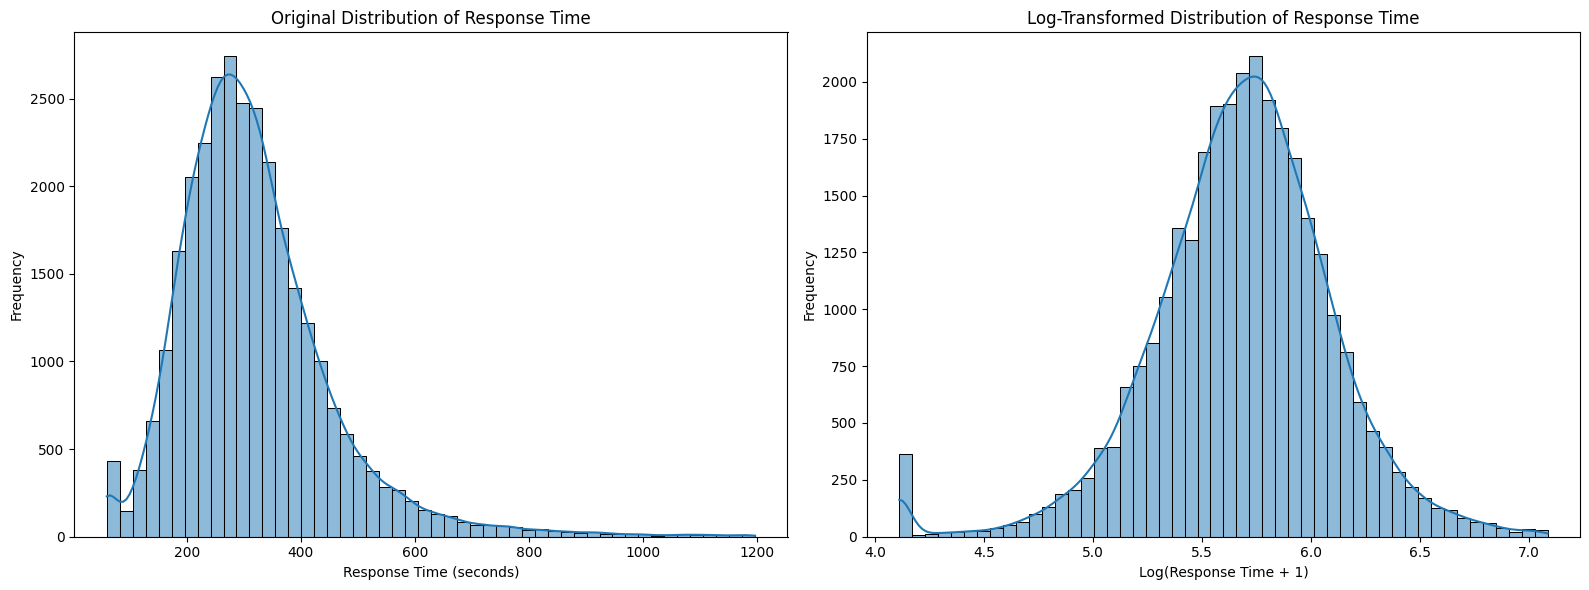

In [ ]:
# Plotting  the log-transformed distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original distribution
sns.histplot(y, bins=50, kde=True, ax=ax1)
ax1.set_title('Original Distribution of Response Time')
ax1.set_xlabel('Response Time (seconds)')
ax1.set_ylabel('Frequency')

# Applying log transformation
y_log = np.log1p(y)

# Plotting the log-transformed distribution
sns.histplot(y_log, bins=50, kde=True, ax=ax2)
ax2.set_title('Log-Transformed Distribution of Response Time')
ax2.set_xlabel('Log(Response Time + 1)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3, random_state=42)

# Create training DataFrame for encoding
train = X_train.copy()
train['first_pump_arriving_attendance_time'] = np.expm1(y_train_log)  # Convert back for encoding

In [ ]:
test = X_test.copy()
test['first_pump_arriving_attendance_time'] = np.expm1(y_test_log)

#### Imputing missing response times using the borough's median time

In [ ]:
# Imputing missing response times using the borough's median time
imputed_count = 0
for borough in train['borough_name'].unique():
    # Skip if borough is NaN
    if pd.isna(borough):
        continue
        
    # Creating borough-specific mask
    borough_mask = missing_mask & (train['borough_name'] == borough)
    
    # Skipping if no rows match
    if borough_mask.sum() == 0:
        continue
        
    # Calculating median time for this borough directly
    borough_data = train[train['borough_name'] == borough]
    median_time = borough_data['first_pump_arriving_attendance_time'].median()
    
    # Skipping if median time is NaN
    if pd.isna(median_time):
        print(f"Borough '{borough}': No valid median time available")
        continue
    
    # Imputing the missing response times for this borough
    train.loc[borough_mask & train['first_pump_arriving_attendance_time'].isna(), 'first_pump_arriving_attendance_time'] = median_time
    
    # Counting the numbre imputed values
    borough_imputed = (borough_mask & train['first_pump_arriving_attendance_time'].isna()).sum()
    imputed_count += borough_imputed
    print(f"Borough '{borough}': Imputed {borough_imputed} response times with median of {median_time:.2f} seconds")

print(f"\nTotal imputed response times: {imputed_count}")

Borough 'CAMDEN': Imputed 0 response times with median of 294.00 seconds
Borough 'TOWER HAMLETS': Imputed 0 response times with median of 265.00 seconds
Borough 'HARINGEY': Imputed 0 response times with median of 306.00 seconds
Borough 'KINGSTON UPON THAMES': Imputed 0 response times with median of 302.00 seconds
Borough 'HOUNSLOW': Imputed 0 response times with median of 305.00 seconds
Borough 'ENFIELD': Imputed 0 response times with median of 333.00 seconds
Borough 'WANDSWORTH': Imputed 0 response times with median of 277.50 seconds
Borough 'BROMLEY': Imputed 0 response times with median of 358.00 seconds
Borough 'HAMMERSMITH AND FULHAM': Imputed 0 response times with median of 284.00 seconds
Borough 'WALTHAM FOREST': Imputed 0 response times with median of 280.00 seconds
Borough 'LEWISHAM': Imputed 0 response times with median of 275.00 seconds
Borough 'HILLINGDON': Imputed 0 response times with median of 349.50 seconds
Borough 'NEWHAM': Imputed 0 response times with median of 298.0

ensures that information from the test set doesn't leak into our model training or evaluation process.

we only calculated statistics (like medians) from our training data
and then applied the same transformation to both train and test sets
so no information from the test set influences our imputation strategy

In [ ]:
# calculating the median times from training data ONLY
borough_median_times = {}
for borough in train['borough_name'].unique():
    if pd.isna(borough):
        continue
    
    borough_data = train[train['borough_name'] == borough]
    median_time = borough_data['first_pump_arriving_attendance_time'].median()
    
    if not pd.isna(median_time):
        borough_median_times[borough] = median_time
        print(f"Borough '{borough}': Training median time = {median_time:.2f} seconds")

# THEN  we are using these precomputed medians for the test set
test_imputed_count = 0
for borough, median_time in borough_median_times.items():
    # Creating mask for missing values in this borough
    borough_mask = (test['borough_name'] == borough) & (test['first_pump_arriving_attendance_time'].isna())
    
    # Imputing the missing values using the training median
    test.loc[borough_mask, 'first_pump_arriving_attendance_time'] = median_time
    
    # Counting the imputed values
    test_imputed_count += borough_mask.sum()
    if borough_mask.sum() > 0:
        print(f"Borough '{borough}': Imputed {borough_mask.sum()} test values with training median of {median_time:.2f} seconds")

print(f"\nTotal imputed response times in test set: {test_imputed_count}")

Borough 'CAMDEN': Training median time = 294.00 seconds
Borough 'TOWER HAMLETS': Training median time = 265.00 seconds
Borough 'HARINGEY': Training median time = 306.00 seconds
Borough 'KINGSTON UPON THAMES': Training median time = 302.00 seconds
Borough 'HOUNSLOW': Training median time = 305.00 seconds
Borough 'ENFIELD': Training median time = 333.00 seconds
Borough 'WANDSWORTH': Training median time = 277.50 seconds
Borough 'BROMLEY': Training median time = 358.00 seconds
Borough 'HAMMERSMITH AND FULHAM': Training median time = 284.00 seconds
Borough 'WALTHAM FOREST': Training median time = 280.00 seconds
Borough 'LEWISHAM': Training median time = 275.00 seconds
Borough 'HILLINGDON': Training median time = 349.50 seconds
Borough 'NEWHAM': Training median time = 298.00 seconds
Borough 'BRENT': Training median time = 319.00 seconds
Borough 'RICHMOND UPON THAMES': Training median time = 327.00 seconds
Borough 'GREENWICH': Training median time = 302.00 seconds
Borough 'WESTMINSTER': Trai

#Checking if there are any remaining missing response times for missing stations

In [ ]:

remaining_missing = (train['first_response_station'].isna()) & (train['first_pump_arriving_attendance_time'].isna())
print(f"Remaining missing response times for unknown stations: {remaining_missing.sum()}")

remaining_missing = (test['first_response_station'].isna()) & (test['first_pump_arriving_attendance_time'].isna())
print(f"Remaining missing response times for unknown stations: {remaining_missing.sum()}")

Remaining missing response times for unknown stations: 0
Remaining missing response times for unknown stations: 0


In [ ]:
y_train = train['first_pump_arriving_attendance_time']
y_test = test['first_pump_arriving_attendance_time']

for 'first_response_station' column rows with missing values were replaced with Unknown_station.

In [ ]:
train.loc[train['first_response_station'].isna(), 'first_response_station'] = 'Unknown Station'

In [ ]:
#for first_pump_arriving_deployed_from_station this is where i was imputing  missing values with 'unkown station'
test.loc[test['first_response_station'].isna(), 'first_response_station'] = 'Unknown Station'

Target encoding columns with high cardinality 

- This method captures the relationship between the categorical features and the target variable, potentially improving the model performance

In [ ]:
import category_encoders as ce
# Specify which categorical columns to encode
categorical_cols = ['borough_name', 'incident_station_ground', 'ward_name', 'first_response_station', ]

# Initialise the target encoder
encoder = ce.TargetEncoder(cols=categorical_cols)

# Separate features and target in your training data
X_train = train.drop('first_pump_arriving_attendance_time', axis=1)
y_train = train['first_pump_arriving_attendance_time']

# Fit and transform the training features
train_encoded = train.copy()
train_encoded[categorical_cols] = encoder.fit_transform(X_train, y_train)[categorical_cols]

# Transform the test features using the same encoder
test_encoded = test.copy()
X_test = test.drop('first_pump_arriving_attendance_time', axis=1)
test_encoded[categorical_cols] = encoder.transform(X_test)[categorical_cols]

In [ ]:

print(f"Encoded training data shape: {train_encoded.shape}")
print(f"Encoded test data shape: {test_encoded.shape}")

# Look at the first few rows to see if the encoding worked
print("\nOriginal categorical columns:")
print(train[categorical_cols].head())
print("\nEncoded categorical columns:")
print(train_encoded[categorical_cols].head())

Encoded training data shape: (22402, 48)
Encoded test data shape: (9602, 48)

Original categorical columns:
               borough_name incident_station_ground      ward_name  \
18114                CAMDEN                  Euston     BLOOMSBURY   
28646         TOWER HAMLETS                Homerton       BOW EAST   
18586              HARINGEY                 Hornsey      NOEL PARK   
31190  KINGSTON UPON THAMES                Surbiton  SURBITON HILL   
30497              HOUNSLOW                 Feltham       HANWORTH   

      first_response_station  
18114                 Euston  
28646               Homerton  
18586        Unknown Station  
31190               Surbiton  
30497                Feltham  

Encoded categorical columns:
       borough_name  incident_station_ground   ward_name  \
18114    305.810684               304.608607  285.020586   
28646    279.258861               311.576132  344.889233   
18586    320.761905               313.400000  334.388943   
31190    321.60

Given the nature of our dataset, we decided to use tree-based algorithms (such as Random Forest or XGBoost) rather than traditional linear regression models.

My dataset contains:
- A large number of binary encoded columns (0s and 1s),
- One-hot encoded features representing categorical variables,
- Numerical mappings like Easting and Northing coordinates.
- Tree algorithms are better suited for this kind of data because:
- They can naturally handle many binary and one-hot features without requiring feature scaling or transformations.
- They are able to capture non-linear relationships and feature interactions automatically, which would be difficult for a linear regression model to learn without heavy manual feature engineering.
- They are more robust when dealing with irrelevant features, as trees can ignore unimportant splits during training.

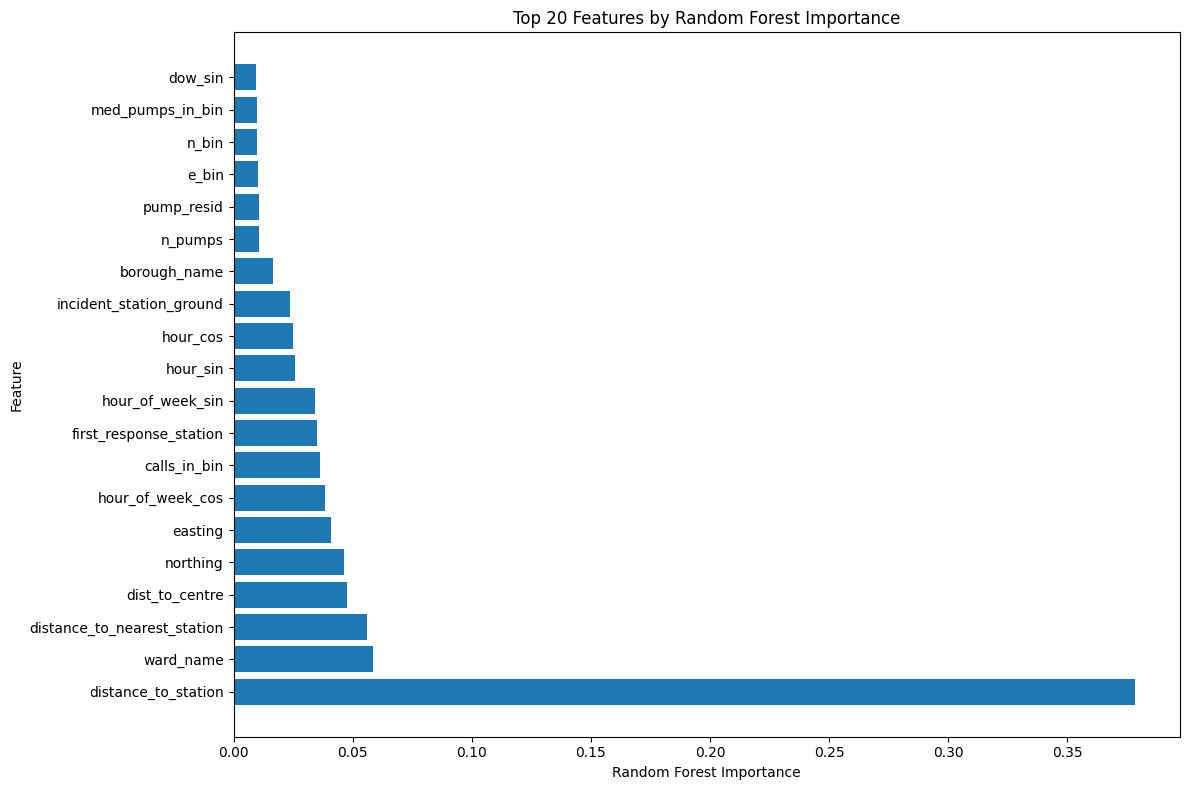

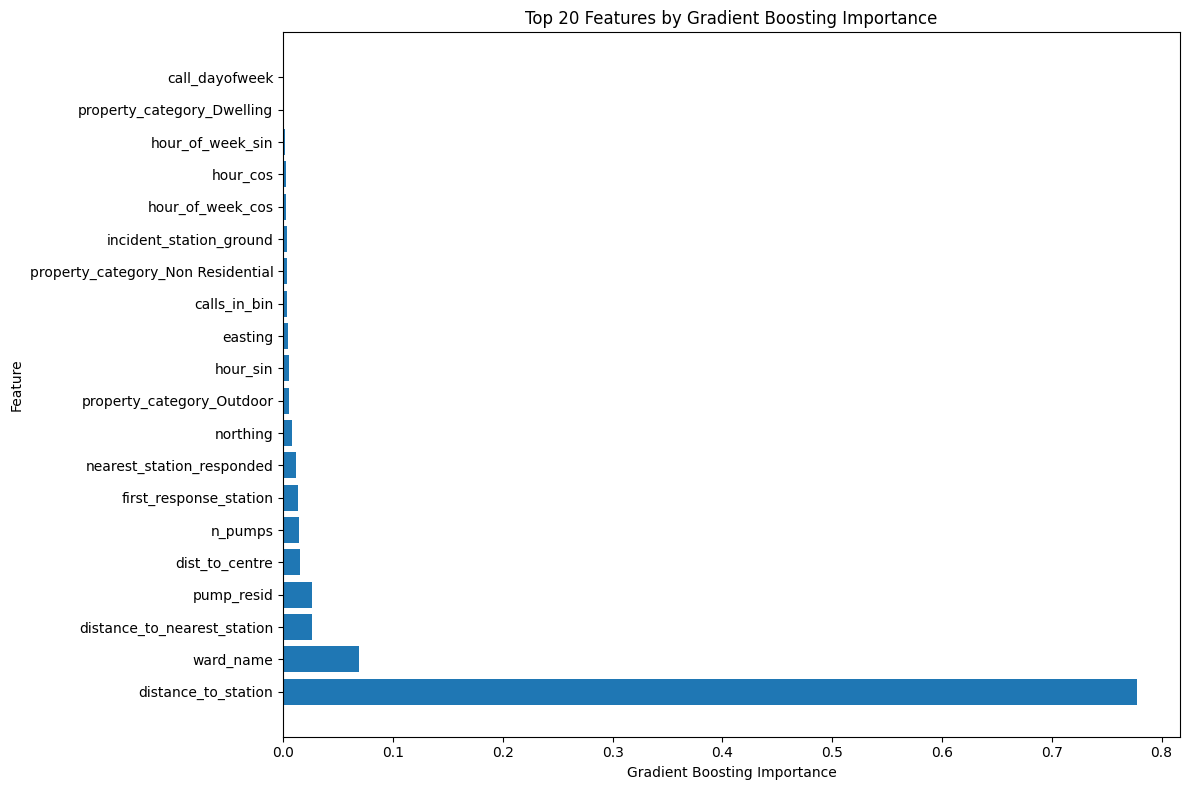

Top 20 features by different methods:
                  Random Forest                  Gradient Boosting
0           distance_to_station                distance_to_station
1                     ward_name                          ward_name
2   distance_to_nearest_station        distance_to_nearest_station
3                dist_to_centre                         pump_resid
4                      northing                     dist_to_centre
5                       easting                            n_pumps
6              hour_of_week_cos             first_response_station
7                  calls_in_bin          nearest_station_responded
8        first_response_station                           northing
9              hour_of_week_sin          property_category_Outdoor
10                     hour_sin                           hour_sin
11                     hour_cos                            easting
12      incident_station_ground                       calls_in_bin
13                 borou

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X_train = train_encoded.drop('first_pump_arriving_attendance_time', axis=1)
y_train = train_encoded['first_pump_arriving_attendance_time']
X_test = test_encoded.drop('first_pump_arriving_attendance_time', axis=1)
y_test = test_encoded['first_pump_arriving_attendance_time']

# Training my Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Use all features, not just selected ones

# Get feature importances from Random Forest
rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)  # Use all features, not just selected ones

# Get feature importances from Gradient Boosting
gb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualise Random Forest feature importances (top 20)
plt.figure(figsize=(12, 8))
plt.barh(rf_importance['Feature'][:20], rf_importance['Importance'][:20])
plt.xlabel('Random Forest Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Random Forest Importance')
plt.tight_layout()
plt.show()

# Visualising Gradient Boosting feature importances (top 20)
plt.figure(figsize=(12, 8))
plt.barh(gb_importance['Feature'][:20], gb_importance['Importance'][:20])
plt.xlabel('Gradient Boosting Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Gradient Boosting Importance')
plt.tight_layout()
plt.show()

# Compare the top features selected by different methods
top_features = pd.DataFrame({
    'Random Forest': rf_importance['Feature'][:20].values,
    'Gradient Boosting': gb_importance['Feature'][:20].values
})

print("Top 20 features by different methods:")
print(top_features)


# Find common important features across methods
rf_top = set(rf_importance['Feature'][:20])
gb_top = set(gb_importance['Feature'][:20])

common_features = rf_top.intersection(gb_top)
print(f"\nFeatures important in both methods: {len(common_features)}")
print(common_features)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
import xgboost as xgb
import lightgbm as lgb

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using your previously selected features from randomforest
X_train_selected = X_train[rf_importance['Feature']]
X_test_selected = X_test[rf_importance['Feature']]

# 1. Try multiple regression models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    #gradient boosting with loss='huber' makes it robust to outliers
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5),

    "XGBoost": xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),

    "LightGBM": lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    
}

n_folds = 5

def rmsle_cv(model, X, y):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                    scoring="neg_mean_squared_error", 
                                    cv=kf))
    return rmse.mean()

results = {}

for name, model in models.items():
    # Cross-validated RMSE
    cv_rmse = rmsle_cv(model, X_train_selected, y_train)
    
    # Fitting the model
    model.fit(X_train_selected, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_selected)
    
    # Evaluatation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "CV RMSE": cv_rmse,
        "Model": model,
        "Predictions": y_pred
    }
    
    print(f"{name}:")
    print(f"  MAE: {mae:.2f} seconds")
    print(f"  RMSE: {rmse:.2f} seconds")
    print(f"  CV RMSE: {cv_rmse:.2f} seconds")
    print(f"  R²: {r2:.4f}")
    print("-" * 50)

#Choosing the best model based on your preferred metric e.g., lowest RMSE
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = results[best_model_name]["Model"]
best_pred = results[best_model_name]["Predictions"]

print(f"\nBest model: {best_model_name}")
print(f"RMSE: {results[best_model_name]['RMSE']:.2f} seconds")


Random Forest:
  MAE: 69.42 seconds
  RMSE: 107.96 seconds
  CV RMSE: 104.68 seconds
  R²: 0.3490
--------------------------------------------------
Gradient Boosting:
  MAE: 65.13 seconds
  RMSE: 105.68 seconds
  CV RMSE: 103.02 seconds
  R²: 0.3763
--------------------------------------------------


c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:33:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:33:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bradley\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:33:30] WARNING: C:\actions-runner\_work\xgboost\x

XGBoost:
  MAE: 67.93 seconds
  RMSE: 106.42 seconds
  CV RMSE: 103.85 seconds
  R²: 0.3676
--------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set

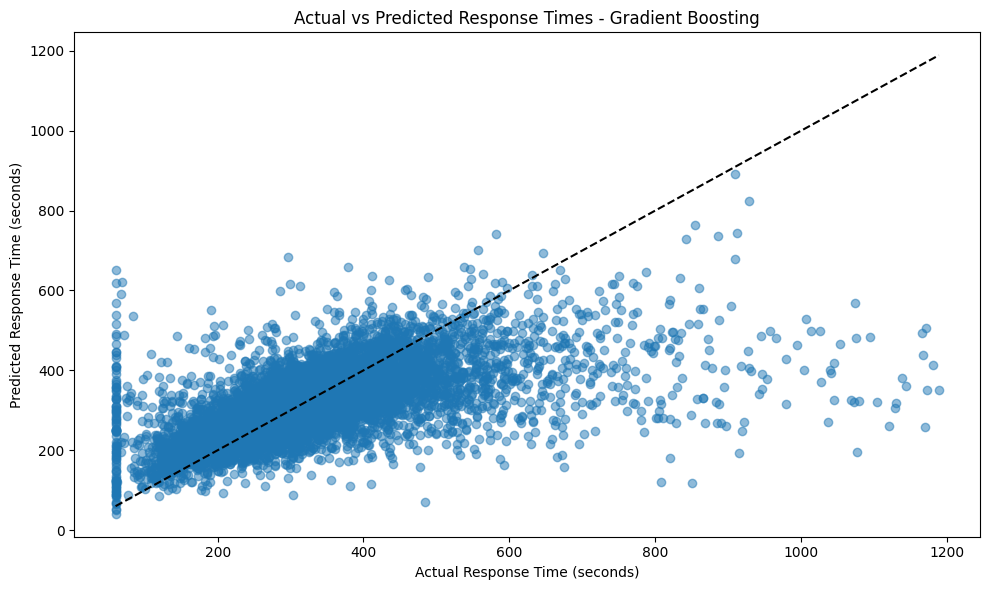

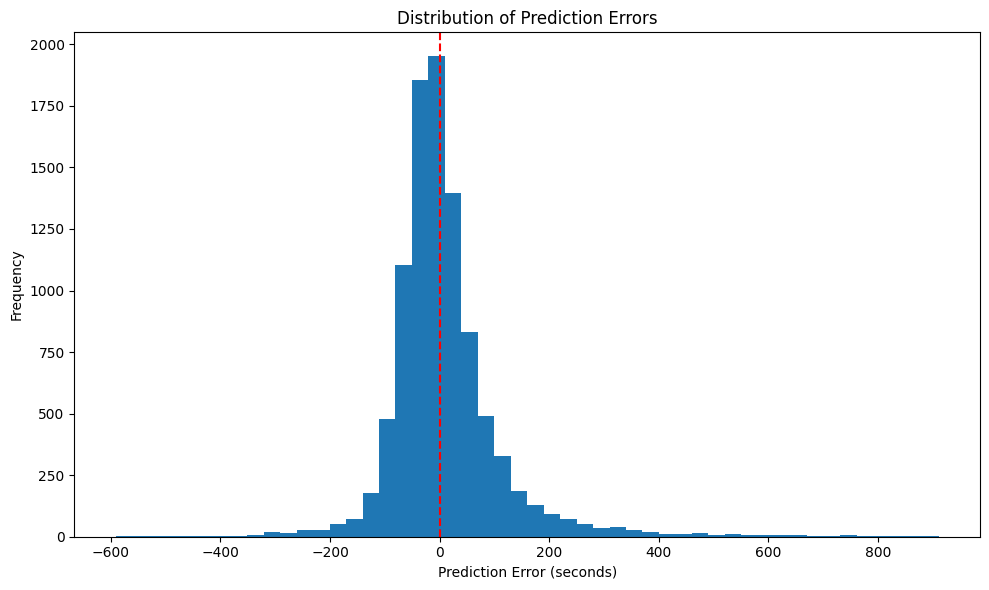

In [ ]:
# 3. Visualising actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Response Time (seconds)')
plt.ylabel('Predicted Response Time (seconds)')
plt.title(f'Actual vs Predicted Response Times - {best_model_name}')
plt.tight_layout()
plt.show()

# 4. Error distribution
errors = y_test - best_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

Stacking models
Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

Averaged base models class

Stacking Ensemble:
  MAE: 66.08 seconds
  RMSE: 105.02 seconds
  CV RMSE: 102.26 seconds
  R²: 0.3841
--------------------------------------------------

Best model: Stacking Ensemble
RMSE: 105.02 seconds


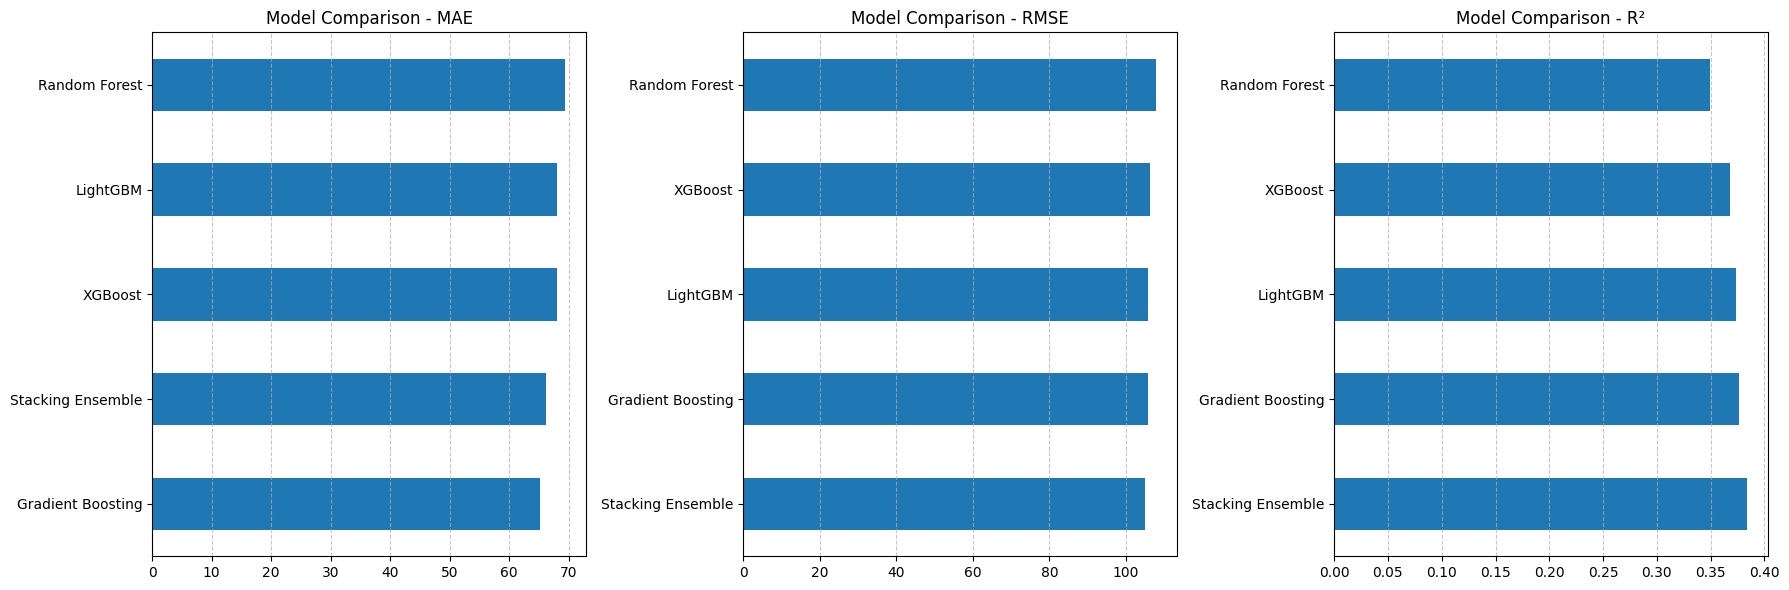

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold, cross_val_score

# Keep your existing code above, and add this after you've evaluated individual models:

#Defining base models for stacking
base_models = [
    ('rf', models["Random Forest"]),
    ('gb', models["Gradient Boosting"]),
    ('xgb', models["XGBoost"]),
    ('lgb', models["LightGBM"])
]

# 2. Defiing the meta-learner (typically a simpler model)
meta_learner = Ridge()

#  this step involves Creating and evaluate the stacking ensemble
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Creating the stacking model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=kf,  # Use same CV strategy as your evaluation
    n_jobs=-1  # Use all available cores
)

# Cross-validating performance
cv_rmse = rmsle_cv(stacking_model, X_train_selected, y_train)

# Fit stacking the model
stacking_model.fit(X_train_selected, y_train)

# Making the predictions
stacking_pred = stacking_model.predict(X_test_selected)

# Evaluating the predictions
stacking_mae = mean_absolute_error(y_test, stacking_pred)
stacking_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred))
stacking_r2 = r2_score(y_test, stacking_pred)

# Adding to the  results
results["Stacking Ensemble"] = {
    "MAE": stacking_mae,
    "RMSE": stacking_rmse,
    "R²": stacking_r2,
    "CV RMSE": cv_rmse,
    "Model": stacking_model,
    "Predictions": stacking_pred
}

print(f"Stacking Ensemble:")
print(f"  MAE: {stacking_mae:.2f} seconds")
print(f"  RMSE: {stacking_rmse:.2f} seconds") 
print(f"  CV RMSE: {cv_rmse:.2f} seconds")
print(f"  R²: {stacking_r2:.4f}")
print("-" * 50)

# Updating the  best model check
best_model_name = min(results, key=lambda x: results[x]["RMSE"])
best_model = results[best_model_name]["Model"]
best_pred = results[best_model_name]["Predictions"]

print(f"\nBest model: {best_model_name}")
print(f"RMSE: {results[best_model_name]['RMSE']:.2f} seconds")

